# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
y = np.random.binomial(1, 0.5, 5)
x, y

(array([[ 0.77655393, -0.35180255],
        [-1.98198863,  1.04049762],
        [ 0.35148647,  1.48859919],
        [ 1.61830653,  2.32822882],
        [-0.71630993,  0.21260517]]),
 array([0, 1, 0, 1, 1]))

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

n=500

pi = 0.5

In [4]:
# sampling
Y_generative = np.concatenate(
    (np.ones(n),
    -1 * np.ones(n)
    ))
X_generative = np.concatenate((
    np.random.multivariate_normal(m1, sigma, n),
    np.random.multivariate_normal(m2, sigma, n)
))


Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

In [5]:
m1 @ np.linalg.inv(sigma)

array([2., 2.])

In [6]:
# computing beta_0 and beta using the formulas
beta_0 = np.log(pi / (1-pi)) + \
    (m2 @ np.linalg.inv(sigma) @ m2) / 2 - \
    (m1 @ np.linalg.inv(sigma) @ m1) / 2

beta = np.linalg.inv(sigma) @ (m1 - m2)
print(beta_0, beta)

-2.0 [2. 2.]


In [7]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.01757253]), array([[1.93222057, 2.02859663]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [8]:
# sampling
X_aux = np.random.binomial(1, 0.5, 2 * n)
x = []
for t in X_aux:
    if t > 0:
        x += [np.random.multivariate_normal(m1, sigma, 1)[0]]
    else:
        x += [np.random.multivariate_normal(m2, sigma, 1)[0]]


X_disciminative = np.stack(x)
Y_discriminative = np.random.binomial(1,
    1 / (1 + np.exp(-beta_0-beta @  X_disciminative.T)),
    2 * n)

In [9]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_disciminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.93701312]), array([[2.10460095, 1.97093053]]))

#### Second bullet point

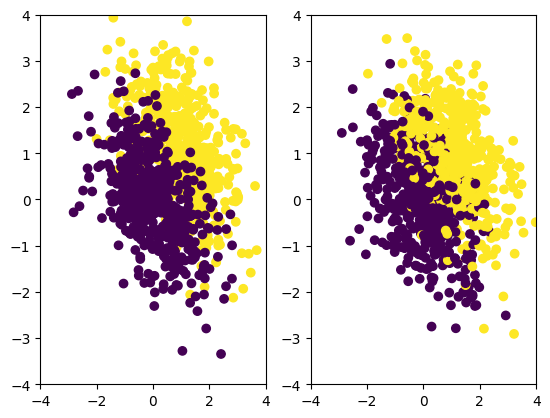

In [10]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_disciminative[:,0], X_disciminative[:,1] , c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

<a href="https://ibb.co/JphQnvN"><img src="https://i.ibb.co/X5w8X79/homework.jpg" alt="homework" border="0"></a><br />

In [11]:
# sampling
l1= 1
l2 = 2


n1 = 1000
x1 = np.random.exponential(1/l1, size=n1)

n2 = 2000
x2 = np.random.exponential(1/l2, size=n2)

x = np.concatenate([x1, x2]).reshape(-1,1)
y = np.concatenate([[1 for _ in range(n1)], [-1 for _ in range(n2)]])

In [12]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(x, y)
(mod.intercept_, mod.coef_)

(array([-1.40370242]), array([[1.02970895]]))

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

In [13]:
beta1 = 1
pi_c = n1/(n1 + n2)
beta0 = np.log((pi_c/(1-pi_c)) / (1 + beta1))
beta0

-1.3862943611198908

## Task 2

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

In [268]:
# def population_risk(a, sigma_eps):
#     return ...

### b)

In [269]:
# sampling

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [270]:
# def empirical_risk(a, x, y):
#     return ...

### c)

In [37]:
# code, plot

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [38]:
# excess risk
# ...

In [39]:
# simulations with fixed sample size

In [276]:
# simulations for various sample sizes

In [40]:
# a nice plot visualising the results (how the unconditional excess risk changes with a sample size)